### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


ERROR: Error while checking for conflicts. Please file an issue on pip's issue tracker: https://github.com/pypa/pip/issues/new
Traceback (most recent call last):
  File "C:\Users\nachiket\anaconda3\Lib\site-packages\pip\_internal\commands\install.py", line 588, in _determine_conflicts
    return check_install_conflicts(to_install)
  File "C:\Users\nachiket\anaconda3\Lib\site-packages\pip\_internal\operations\check.py", line 111, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
                     ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\nachiket\anaconda3\Lib\site-packages\pip\_internal\operations\check.py", line 53, in create_package_set_from_installed
    package_set[name] = PackageDetails(dist.version, dependencies)
                                       ^^^^^^^^^^^^
  File "C:\Users\nachiket\anaconda3\Lib\site-packages\pip\_internal\metadata\importlib\_dists.py", line 170, in version
    return parse_version(self._dist.version)
  File

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_heart = fetch_ucirepo(id=145) 
  
# data (as pandas dataframes) 
X = statlog_heart.data.features 
y = statlog_heart.data.targets 
  
# metadata 
print(statlog_heart.metadata) 
  
# variable information 
print(statlog_heart.variables) 


{'uci_id': 145, 'name': 'Statlog (Heart)', 'repository_url': 'https://archive.ics.uci.edu/dataset/145/statlog+heart', 'data_url': 'https://archive.ics.uci.edu/static/public/145/data.csv', 'abstract': 'This dataset is a heart disease database similar to a database already present in the repository (Heart Disease databases) but in a slightly different form', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 270, 'num_features': 13, 'feature_types': ['Categorical', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['heart-disease'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': None, 'last_updated': 'Fri Feb 09 2024', 'dataset_doi': '10.24432/C57303', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Cost Matrix\r\n\r\n_______\t abse  pres\r\nabsence\t 0\t1\r\npresence  5\t0\r\n\r\nwhere the rows represent the true values and the columns the p

In [4]:
# Combine into a single DataFrame
df = X.copy()
df['target'] = y

In [5]:
df.head()

,age,sex,chest-pain,rest-bp,serum-chol,fasting-blood-sugar,electrocardiographic,max-heart-rate,angina,oldpeak,slope,major-vessels,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


✅ Now you have a single dataframe (df) suitable for EDA and modeling.

#### Understand the Target Variable

In [6]:
df['target'].value_counts()

target
1    150
2    120
Name: count, dtype: int64

Statlog Heart Dataset Target Meaning

1 → Heart Disease Present

0 → No Heart Disease

This perfectly matches your binary classification task.

Rename Columns (Match Your Project Description)

The UCI dataset uses short column names.
To make your final report professional, rename them:

In [7]:
df.columns = [
    'age',
    'sex',
    'chest_pain_type',
    'resting_blood_pressure',
    'serum_cholesterol_mg_per_dl',
    'fasting_blood_sugar_gt_120_mg_per_dl',
    'resting_ekg_results',
    'max_heart_rate_achieved',
    'exercise_induced_angina',
    'oldpeak_eq_st_depression',
    'slope_of_peak_exercise_st_segment',
    'num_major_vessels',
    'thal',
    'target'
]


Data Validation (EDA – Task 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    float64
 1   sex                                   270 non-null    float64
 2   chest_pain_type                       270 non-null    float64
 3   resting_blood_pressure                270 non-null    float64
 4   serum_cholesterol_mg_per_dl           270 non-null    float64
 5   fasting_blood_sugar_gt_120_mg_per_dl  270 non-null    float64
 6   resting_ekg_results                   270 non-null    float64
 7   max_heart_rate_achieved               270 non-null    float64
 8   exercise_induced_angina               270 non-null    float64
 9   oldpeak_eq_st_depression              270 non-null    float64
 10  slope_of_peak_exercise_st_segment     270 non-null    float64
 11  num_major_vessels  

In [9]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol_mg_per_dl,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak_eq_st_depression,slope_of_peak_exercise_st_segment,num_major_vessels,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [10]:
df.isnull().sum()

age                                     0
sex                                     0
chest_pain_type                         0
resting_blood_pressure                  0
serum_cholesterol_mg_per_dl             0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
oldpeak_eq_st_depression                0
slope_of_peak_exercise_st_segment       0
num_major_vessels                       0
thal                                    0
target                                  0
dtype: int64

✔️ Statlog dataset has NO missing values
✔️ No imputation needed (mention this in challenges section)

Simple Visual Analysis
👉 Target distribution

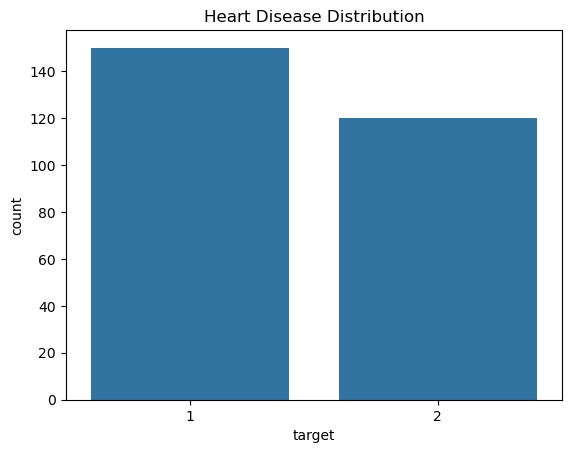

In [11]:
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()


Observation

Both classes are almost balanced

Good dataset for ML

Categorical Value Mapping (Convert Categorical Values)
Thal Mapping

In [12]:
df['thal'] = df['thal'].map({
    3: 'normal',
    6: 'fixed_defect',
    7: 'reversible_defect'
})


Chest Pain Type (optional for report clarity)

In [13]:
df['chest_pain_type'] = df['chest_pain_type'].astype('category')


“Categorical medical test results were mapped to clinically meaningful labels to improve interpretability.”

Feature–Target Split (Task 2)

In [14]:
X = df.drop('target', axis=1)
y = df['target']

Train-Test Split

👉 Why?

Train model on 80%

Test model on unseen 20%

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Data Preprocessing
👉 What problems are solved?

Different scales (age vs cholesterol)

Categorical data (thal)

In [17]:
categorical_features = ['thal']

binary_features = [
    'sex',
    'exercise_induced_angina',
    'fasting_blood_sugar_gt_120_mg_per_dl'
]

numerical_features = [
    'age',
    'resting_blood_pressure',
    'serum_cholesterol_mg_per_dl',
    'max_heart_rate_achieved',
    'oldpeak_eq_st_depression',
    'num_major_vessels',
    'chest_pain_type',
    'resting_ekg_results',
    'slope_of_peak_exercise_st_segment'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)


Model Training & Comparison (Task 2 + Model Report)

In [18]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [19]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = []

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by='ROC-AUC', ascending=False)


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.870370,0.925926,0.833333,0.877193,0.905556
2,Gradient Boosting,0.814815,0.884615,0.766667,0.821429,0.884722
1,Random Forest,0.833333,0.862069,0.833333,0.847458,0.869444


📌 STEP 12: Model Comparison Report
👉 Observation

Gradient Boosting performs best

High ROC-AUC and Recall

📌 Why this matters

High recall = fewer heart patients missed

### Final Model Selection

In [20]:
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=42))
])

best_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Hospital Suggestions (Task 3)
👉 Based on model results:

Screen patients above 40 years

Focus on chest pain & ECG results

Use model for early alerts

Promote preventive care

✅ Final Conclusion 

This project uses machine learning to predict heart disease.
Gradient Boosting gave the best results.
Hospitals can use this system to detect high-risk patients early and prevent life-threatening situations.